Goal of this notebook is to explore and impliment community measures to my neural network. Specifically, detect and display communities based on synaptic strength. This way I can hopefully identify which LE neurons have become recruited into a backbone, as they will become part of its "cluster" or "community".

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import random as RD
from matplotlib import colors
import winsound
import csv
import copy
from tqdm import tqdm

import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import itertools

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


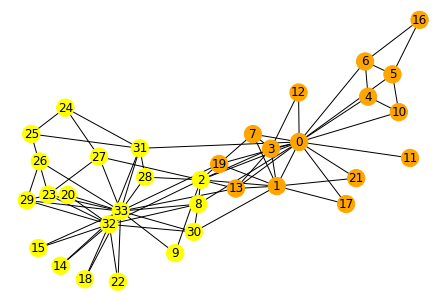

In [2]:
# Example code
G = nx.karate_club_graph()
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
    
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('orange')
    else:
        color_map.append('yellow')
nx.draw(G, node_color=color_map, with_labels=True)


Number of Nodes: 20 Number of Edges: 40


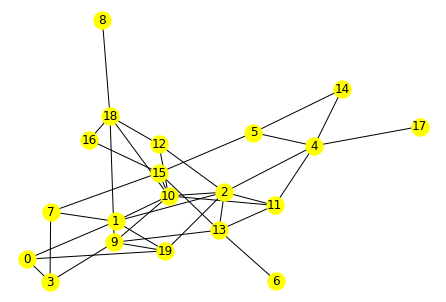

In [78]:
my_graph = nx.Graph()
node_list = range(0,20)

node_att_list = []
for node in node_list:
    node_att_list.append((node,{"type":"LE"}))
    
my_graph.add_nodes_from(node_att_list)

edges = []
for node1 in node_list:
    for node2 in node_list:
        rand_num = RD.random()
        if rand_num < 0.1:
            edges.append((node1,node2,{'weight': 10*rand_num}))
            
my_graph.add_edges_from(edges)

nx.draw(my_graph, node_color='yellow', with_labels=True)
print('Number of Nodes:',my_graph.number_of_nodes(),'Number of Edges:',my_graph.number_of_edges())

In [82]:
print(my_graph.nodes.data())

print(nx.clustering(my_graph)) #LOOK INTO WHAT CLUSTERING IS SOME MORE... HOW IS IT RELATED TO COMMUNITIES?

[(0, {'type': 'LE'}), (1, {'type': 'LE'}), (2, {'type': 'LE'}), (3, {'type': 'LE'}), (4, {'type': 'LE'}), (5, {'type': 'LE'}), (6, {'type': 'LE'}), (7, {'type': 'LE'}), (8, {'type': 'LE'}), (9, {'type': 'LE'}), (10, {'type': 'LE'}), (11, {'type': 'LE'}), (12, {'type': 'LE'}), (13, {'type': 'LE'}), (14, {'type': 'LE'}), (15, {'type': 'LE'}), (16, {'type': 'LE'}), (17, {'type': 'LE'}), (18, {'type': 'LE'}), (19, {'type': 'LE'})]


In [113]:


k = 1 # k determines the number of tuples of communities to get.
comp = girvan_newman(my_graph)
# for communities in itertools.islice(comp, k):
#     print(tuple(sorted(c) for c in communities))
   
for comm in comp:
    count+= 1
    print(comm)

({0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19}, {17, 4, 5, 14})
({0, 1, 2, 3, 6, 7, 9, 10, 11, 12, 13, 15, 19}, {17, 4, 5, 14}, {8, 16, 18})
({0, 1, 2, 3, 7, 9, 10, 11, 12, 13, 15, 19}, {17, 4, 5, 14}, {6}, {8, 16, 18})
({0, 1, 2, 9, 10, 11, 12, 13, 15, 19}, {3, 7}, {17, 4, 5, 14}, {6}, {8, 16, 18})
({0, 1, 19}, {2, 9, 10, 11, 12, 13, 15}, {3, 7}, {17, 4, 5, 14}, {6}, {8, 16, 18})
({0, 1, 19}, {2, 10, 11, 12, 13, 15}, {3, 7}, {17, 4, 5, 14}, {6}, {8, 16, 18}, {9})
({0, 1, 19}, {11, 2, 10, 12}, {3, 7}, {17, 4, 5, 14}, {6}, {8, 16, 18}, {9}, {13, 15})
({0, 1, 19}, {11, 2, 10, 12}, {3, 7}, {4, 5, 14}, {6}, {8, 16, 18}, {9}, {13, 15}, {17})
({0, 1, 19}, {11, 2, 10, 12}, {3, 7}, {4, 5, 14}, {6}, {8}, {9}, {13, 15}, {16, 18}, {17})
({0, 1, 19}, {2, 10, 12}, {3, 7}, {4, 5, 14}, {6}, {8}, {9}, {11}, {13, 15}, {16, 18}, {17})
({0}, {1, 19}, {2, 10, 12}, {3, 7}, {4, 5, 14}, {6}, {8}, {9}, {11}, {13, 15}, {16, 18}, {17})
({0}, {1}, {2, 10, 12}, {3, 7}, {4, 5, 14}, {6}, {8}, {9}, {11}, 

As is illustrated by printing the "comp" variable above, the girvan_newman function returns not only one splitting of the network into communities, but every splitting of the network into communities. I.e., the first element in comp are the nodes split into two communities. The second element they are split into 3 communities, and so on, all the way until each node is its own community.

Community to be Plotted: [[0, 1, 2, 3, 7, 9, 10, 11, 12, 13, 15, 19], [4, 5, 14, 17], [6], [8, 16, 18]]


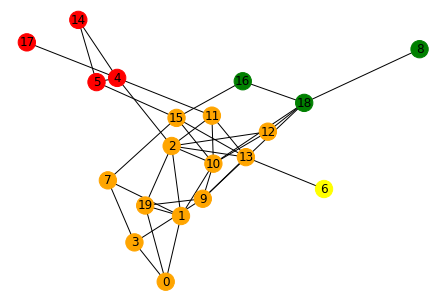

In [146]:
# to make the communities more accessible, put them into a list. The generator object "comp" is not subscriptable.
comp = girvan_newman(my_graph) # For some reason I need to call this again in order for comp to have values.
max_comm = [] 
all_comm = [] # list to hold all community splittings
k = 3 # k+1 = the number of desired community splittings.

for communities in itertools.islice(comp, k):
    all_comm.append(list(sorted(c) for c in communities))

# list to hold one arrangement of communities, specifically the highest order one based on k.
max_comm = all_comm[-1]
print('Community to be Plotted:',max_comm)

colors = ['orange','red','yellow','green','pink','cyan']
color_map = []

for node in my_graph:
    for i,community in enumerate(max_comm):
        if node in community:
            color_map.append(colors[i])

nx.draw(my_graph, node_color=color_map, with_labels=True)